In [353]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime

In [321]:
# Loading data in data frame
# EDA Step 1: Data sourcing
loan_df = pd.read_csv("loan.csv", header=0, low_memory=False)
print (loan_df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [322]:
loan_df.shape


(39717, 111)

In [323]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [324]:
# EDA Step 2: Data Cleaning
# Filtering columns which should be dropped from the dataset which have NA only
# Eg: Columns we got from the excel: AJ + AY onwards 
loan_df.dropna(how='all', axis='columns', inplace=True)        

In [325]:
loan_df.shape

(39717, 57)

In [326]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [327]:
# columns_to_drop contains list of columns to be filtered - either they have same value or 
# don't contribute in analysis 
# member_id may not be useful but we are keeping it to have a record identifier
# The customer variables are not available at the time of loan processing and thats why excluding them
# funded_amnt is the amount which reviewer says but actual value is given by funded_amnt_inv which we have
# Hence we are dropping funded_amnt
columns_to_drop = [
                   'id', 'member_id', 'emp_title', 'pymnt_plan', 'url', 'desc', 'title', 'addr_state', 
                   'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 
                   'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
                   'delinq_amnt', 'tax_liens','collection_recovery_fee', 'inq_last_6mths',
                   'pymnt_plan', 'sub_grade', 'delinq_2yrs', 'earliest_cr_line', 'open_acc',
                   'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
                    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                    'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',
                    'last_credit_pull_d', 'funded_amnt' 
                  ]
loan_df.drop(columns_to_drop, axis = 1, inplace = True)

In [328]:
loan_df.shape

(39717, 19)

In [329]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'dti', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [330]:
# Before doing any further analysis getting rid of records having loan_status as current
# we are removing this because this we can't predict the behaiour here.
loan_df = loan_df[loan_df.loan_status != "Current"]

In [331]:
loan_df.shape

(38577, 19)

In [332]:
# Now lets clean up/ modify few columns based on % missing data
missing_data = (loan_df.isna().sum()/len(loan_df.index))*100

cols_gt_60_percent = []
for k,v in missing_data.items():
    if v > 60:
        cols_gt_60_percent.append(k)

# mths_since_last_delinq     64.559193
# mths_since_last_record     92.897322
# next_pymnt_d              100.000000 < -- this is not given correctly by pandas lib
loan_df.drop(cols_gt_60_percent, axis = 1, inplace = True)

In [333]:
loan_df.shape

(38577, 16)

In [334]:
# Removing months word from term column
loan_df['term'] = list(map(lambda a:a.split(' ')[1], loan_df['term']))

In [335]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,dti,pub_rec_bankruptcies
0,5000,4975.0,36,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,27.65,0.0
1,2500,2500.0,60,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,1.00,0.0
2,2400,2400.0,36,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,8.72,0.0
3,10000,10000.0,36,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,20.00,0.0
5,5000,5000.0,36,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,11.20,0.0


In [336]:
# Removing % from int_rate and converting result to a float
loan_df['int_rate'] = list(map(lambda a:float(a.split('%')[0]), loan_df['int_rate']))

In [337]:
# converting annual_inc and funded_amnt_inv to int as there are very few having float values
loan_df['annual_inc'] = list(map(lambda a:int(a), loan_df['annual_inc']))
loan_df['funded_amnt_inv'] = list(map(lambda a:int(a), loan_df['funded_amnt_inv']))

In [338]:
# Finding columns which needs to be filled properly 
loan_df.isna().sum() 

loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

In [339]:
# Taking mode to fill na values for emp_length and pub_rec_bankruptcies

loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0], inplace = True)
loan_df['pub_rec_bankruptcies'].fillna(loan_df['pub_rec_bankruptcies'].mode()[0], inplace = True)
loan_df['emp_length']
loan_df['pub_rec_bankruptcies']

0        0.0
1        0.0
2        0.0
3        0.0
5        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: pub_rec_bankruptcies, Length: 38577, dtype: float64

In [340]:
# Here we see 9 bins are already proper only < 1 year and 10+ years needs to be corrected
# we are making < 1 year as 0 year and 10+ years as 10
loan_df['emp_length'] = loan_df['emp_length'].map(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))

In [341]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,dti,pub_rec_bankruptcies
0,5000,4975,36,10.65,162.87,B,10,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,860xx,27.65,0.0
1,2500,2500,60,15.27,59.83,C,0,RENT,30000,Source Verified,Dec-11,Charged Off,car,309xx,1.00,0.0
2,2400,2400,36,15.96,84.33,C,10,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,606xx,8.72,0.0
3,10000,10000,36,13.49,339.31,C,10,RENT,49200,Source Verified,Dec-11,Fully Paid,other,917xx,20.00,0.0
5,5000,5000,36,7.90,156.46,A,3,RENT,36000,Source Verified,Dec-11,Fully Paid,wedding,852xx,11.20,0.0


In [342]:
# converting annual_inc to int as there are very few having float values
loan_df['annual_inc'] = list(map(lambda a:int(a), loan_df['annual_inc']))

In [343]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,dti,pub_rec_bankruptcies
0,5000,4975,36,10.65,162.87,B,10,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,860xx,27.65,0.0
1,2500,2500,60,15.27,59.83,C,0,RENT,30000,Source Verified,Dec-11,Charged Off,car,309xx,1.00,0.0
2,2400,2400,36,15.96,84.33,C,10,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,606xx,8.72,0.0
3,10000,10000,36,13.49,339.31,C,10,RENT,49200,Source Verified,Dec-11,Fully Paid,other,917xx,20.00,0.0
5,5000,5000,36,7.90,156.46,A,3,RENT,36000,Source Verified,Dec-11,Fully Paid,wedding,852xx,11.20,0.0


In [344]:
# We should convert issue_d to datetime object and extract year and month
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))).dt.strftime('%m-%Y')

In [345]:
loan_df['issue_d_year'] = pd.DatetimeIndex(loan_df['issue_d']).year

In [346]:
loan_df['issue_d_month'] = pd.DatetimeIndex(loan_df['issue_d']).month

In [347]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,5000,4975,36,10.65,162.87,B,10,RENT,24000,Verified,12-2011,Fully Paid,credit_card,860xx,27.65,0.0,2011,12
1,2500,2500,60,15.27,59.83,C,0,RENT,30000,Source Verified,12-2011,Charged Off,car,309xx,1.00,0.0,2011,12
2,2400,2400,36,15.96,84.33,C,10,RENT,12252,Not Verified,12-2011,Fully Paid,small_business,606xx,8.72,0.0,2011,12
3,10000,10000,36,13.49,339.31,C,10,RENT,49200,Source Verified,12-2011,Fully Paid,other,917xx,20.00,0.0,2011,12
5,5000,5000,36,7.90,156.46,A,3,RENT,36000,Source Verified,12-2011,Fully Paid,wedding,852xx,11.20,0.0,2011,12


In [351]:
# We created the modified csv to analyze on smaller data
loan_df.to_csv('modified_loan.csv', index = None, header=True)

In [352]:
loan_df.shape

(38577, 18)

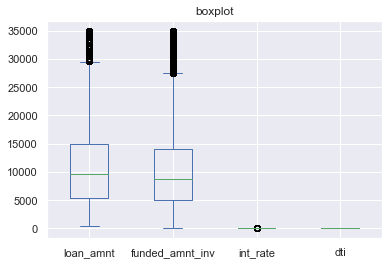

In [369]:
# EDA Step 3: Univariate Analysis
# A. Finding outliers in loan_amnt, funded_amnt_inv, int_rate, dti
# First removing outliers in loan_amnt
x = loan_df[['loan_amnt', 'funded_amnt_inv', 'int_rate', 'dti']].plot(kind='box', title='boxplot')